In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 16: Hypothesis Testing Pt. II

## Hypothesis Testing Example: Right-Handedness

We want to assess the null hypothesis that 90% of CMPSC 5a students are right-handed. Suppose that we took a simple random sample of 82 CMPSC 5a students and asked whether they are left or right handed:

In [3]:
# Load results from the class data survey
hand_data = Table.read_table('./data/cmpsc5a-classdata-w23.csv').select('Handedness')
hand_data.show(5)

Handedness
Right-handed
Right-handed
Right-handed
Right-handed
Right-handed


Our test statistic is `abs(frac_right_handed - 0.9)`:

In [4]:
# Count how many respondents are left-handed
n_right_handed = np.count_nonzero(hand_data.column('Handedness') == 'Right-handed')

# Convert to a fraction
observed_frac_right_handed = n_right_handed / 82

# Compute test statistic
observed_test_stat = abs(observed_frac_right_handed - 0.9)

print('Observed value of the test statistic:', observed_test_stat)

Observed value of the test statistic: 0.02682926829268295


The observed value of the test statistic is about 0.03, which is different from the value of zero predicted by the null hypothesis. Some random variation is to be expected---it is a random sample, after all. But is this discrepancy too big to be explained by random variation alone?

We need to repeatedly simulate the class data survey responses *as if the null hypothesis were true*, to see what values of the test statistic we would end up with.

**Question:** write a line of code to create an array of 82 survey responses, where each response has a 90% chance of being `"Right-handed"` and a 10% chance of being `"Other"`.

In [5]:
simulated_responses = np.random.choice(
    make_array('Right-handed', 'Other'),  # What are the possible outcomes
    82,  # How many samples to generate
    p=make_array(0.9, 0.1))  # What are the probabilities for each outcome

This array contains an example of survey responses that we might see if the null hypothesis were true (i.e., if CMPSC 5a students have a 90% chance of being right-handed). Write another line of code to calculate the value of the test statistic:

In [7]:
simulated_frac_right_hand = np.count_nonzero(simulated_responses == 'Right-handed') / 82
simulated_test_stat = abs(simulated_frac_right_hand - 0.9)

In [8]:
simulated_test_stat

0.02195121951219514

This number is a *single sample* from the distribution of the test statistic that is predicted by the null hypothesis. To get a better approximation of this distribution, we will need to repeat this process many times.

In [9]:
simulated_test_stats = make_array()
for i in range(10000):
    
    # Simulate our dataset as if the null hyp were correct
    simulated_responses = np.random.choice(
        make_array('Right-handed', 'Other'),
        82,
        p=make_array(0.9, 0.1))
    
    # Calculate the test statistic
    simulated_frac_right_hand = np.count_nonzero(simulated_responses == 'Right-handed') / 82
    simulated_test_stat = abs(simulated_frac_right_hand - 0.9)
    
    # Record this simulated value of the test statistic
    simulated_test_stats = np.append(simulated_test_stats, simulated_test_stat)

In [11]:
len(simulated_test_stats)

10000

Now we can use a histogram to plot this distribution. Remember this is an *approximation* of the true probability distribution predicted by the null hypothesis. We could calculate the exact distribution using probability rules if we wanted to, but after 10,000 trials, this empirical distribution is probably a very good approximation.

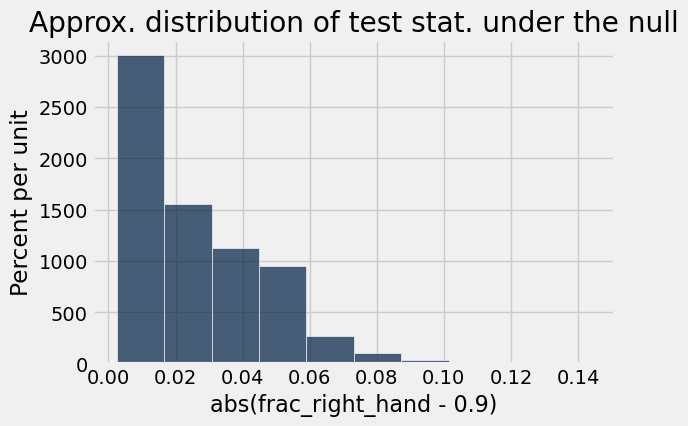

In [12]:
Table().with_column('abs(frac_right_hand - 0.9)', simulated_test_stats).hist()
plots.title('Approx. distribution of test stat. under the null');

Recall the observed value of the test statistic:

In [13]:
print('Observed value of the test statistic:', observed_test_stat)

Observed value of the test statistic: 0.02682926829268295


We chose this test statistic so that *larger values make us lean toward the alternative hypothesis*. How should we conclude this test? We can calculate what fraction of the simulated test values are at least the observed value of the test statistic:

In [14]:
sum(simulated_test_stats >= observed_test_stat) / 10000

0.46779999999999999

Roughly half of the simulated results are at least as high as the observed value. It appears that a test statistic value of 0.027 is consistent with the null hypothesis, so in this case, our data supports the model.

## Hypothesis Testing Example: Commute Times

Let's define a "short commute" as a commute that is strictly less than 15 minutes. According to [Statista](https://www.statista.com/chart/24684/average-duration-of-a-one-way-commute/), 24% of Americans have a short commute. Since many of you live on campus or in IV, we might expect the fraction of students in CMPSC 5a who have a short commute is higher. Does the evidence support this claim?

**Null hypothesis:** 24% of students in CMPSC 5a have a short commute.

**Alternative Hypothesis:** the fraction of CMPSC 5a students who have a short commute is > 24%.

To perform a hypothesis test, let's load and clean the `Commute Time` column from the class data survey.

In [15]:
class_data = Table.read_table('./data/cmpsc5a-classdata-w23.csv')
commute_data = class_data.where('Commute Time', are.above_or_equal_to(0)).select('Commute Time')
commute_data.show(5)

Commute Time
15
10
30
30
15


**Question:** what test statistic should we use? Calculate the observed value of the test statistic from the `commute_data` table.

In [16]:
observed_frac = sum(commute_data.column('Commute Time') < 15) / 78
observed_frac

0.5641025641025641

To approximate the distribution of the test statistic, we will need to simulate the results of the class survey (at least the `Commute Time` column) under the null hypothesis. In other words, we will simulate what fraction of the 78 respondents have a short commute, if 24% of the class has a short commute.

In [17]:
def simulate_responses():
    """
    Simulate the fraction of survey respondents with a short commute,
    under the null hypothesis that 24% of the class has a short commute.
    """
    outcome_probabilities = make_array(0.24, 0.76)
    n_responses = 78
    simulated_fractions = sample_proportions(n_responses, outcome_probabilities)
    return simulated_fractions.item(0)

In [20]:
simulate_responses()

0.2692307692307692

We will approximate the distribution of the test statistic under the null hypothesis by simulating the responses 10,000 times. We will then plot a histogram of the results, and compare it to the observed value of the test statistic.

In [21]:
simulated_stats = make_array()
for i in range(10000):
    simulated_stats = np.append(simulated_stats, simulate_responses())

In [23]:
len(simulated_stats)

10000

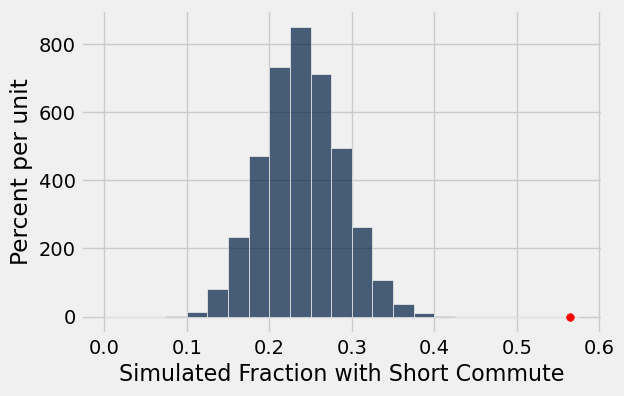

In [24]:
# Generate a histogram for the distribution of the test statistic
my_bins = np.arange(0, 0.6, 0.025)
Table().with_column('Simulated Fraction with Short Commute', simulated_stats).hist(0, bins=my_bins)

# Plot the observed value of the test statistic
plots.ylim([-0.5, 9])
plots.scatter(observed_frac, 0, color='red', s=30);

**Question:** can we reject the null hypothesis? What do we conclude?

In [ ]:
# Yes!

## Example: Computing p-Values

Suppose that we find a coin on the sidewalk and want to decide if it's fair (i.e., a 50-50 chance of landing heads or tails). 

**Null Hypothesis:** the coin has a 50% chance of landing on heads and 50% chance of landing on tails each flip.

**Alternative Hypothesis:** the null hypothesis is wrong, i.e., the coin is biased.

**Data:** we flip the coin 100 times and find that it lands on heads 58% of the time.

**Test statistic:** we use `abs(frac_heads - 0.5)`. Larger values indicate that the actual observed fraction of heads if further from the expected value of 0.5 under the null hypothesis, so *large values of this statistic suggest that the null hypothesis is wrong.*

**Question:** what is the observed value of the test statistic?

In [ ]:
# ...

To approximate the distribution of the test statistic predicted by the null hypothesis, we can use the `sample_proportions` function to simulate the outcome of 100 fair coin flips.

In [ ]:
coin_test_stats = make_array()
for i in range(10000):
    
    # Simulate the fraction of heads / tails out of 100 fair coin flips
    simulated_outcomes = sample_proportions(100, make_array(0.5, 0.5))
    frac_heads = simulated_outcomes.item(0)
    
    # Compute the test statistic and append it to the coin_test_stats array
    simulated_test_stat = abs(frac_heads - 0.5)
    coin_test_stats = np.append(coin_test_stats, simulated_test_stat)

To conclude the test, we will plot the distribution of the test statistic predicted by the null hypothesis, and compare it to the observed value of the test statistic.

In [ ]:
# Plot a histogram of the test statistic distribution
my_bins = np.arange(0, 0.22, 0.02)
Table().with_column('Simulated Test Stats', coin_test_stats).hist(bins=my_bins)

# Mark the observed value on the histogram 
plots.ylim([-0.5, 18])
plots.scatter(0.08, 0, color='red', s=30);

The observed value is larger than most of the simulated outcomes, indicating that observing this data would be unlikely if the null hypothesis were true. But is it so unlikely that we have disproven the null hypothesis, demonstrating that the coin is biased?

**Question:** using the `coin_test_stats` array, calculate the $p$-value. In other words, calculate what fraction of the test statistics simulated under the null hypothesis are *at least as large* as the observed value of 0.08.

In [ ]:
# ...

**Question:** the data isn't very consistent with the null hypothesis, but is the result *statistically significant*? What is the outcome of the hypothesis test?

In [ ]:
# ...